<a href="https://colab.research.google.com/github/junher30/09-week/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>üìë Proyecto Final</b></h1>







---

<b>Materia:</b> Ciencia de datos <br>
<b>Participantes:</b> Jose Gregorio Hernandez Vanegas Y Nikol Duran Bahamon. <br>


---


                      









<h2><B>üì≤ Amazon Kindle Book An√°lisis de satisfacci√≥n del cliente </B></h2>
<b>Amazon Kindle</b> es un lector de libros electronicos (e-rider) creado por Amazon.com. Permite leer libros digitales, peri√≥dicos y revistas en una pantalla que imita el aspecto del papel, utilizando tecnolog√≠a de tinta electr√≥nica. Adem√°s, los Kindle se pueden usar para leer libros en l√≠nea a trav√©s de Kindle para Web.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


DataKindle = pd.read_csv("/content/all_kindle_review.csv")

DataKindle.head()

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0             0       11539  B0033UV8HI  [8, 10]       3   
1             1        5957  B002HJV4DE   [1, 1]       5   
2             2        9146  B002ZG96I4   [0, 0]       3   
3             3        7038  B002QHWOEU   [1, 3]       3   
4             4        1776  B001A06VJ8   [0, 1]       4   

                                          reviewText   reviewTime  \
0  Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1  Great short read.  I didn't want to put it dow...   10 8, 2013   
2  I'll start by saying this is the first of four...  04 11, 2014   
3  Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4  I did not expect this type of book to be in li...  12 31, 2012   

       reviewerID  reviewerName                   summary  unixReviewTime  
0  A3HHXRELK8BHQG        Ridley  Entertaining But Average      1283385600  
1  A2RGNZ0TRF578I  Holly Butler   Terrific menage scenes!      1381190400  
2  A3S0H2HV6U1I7F       Merissa          Snapdragon Alley      1397174400  
3   AC4OQW3GZ919J    Cleargrace    very light murder cozy      1404518400  
4  A3C9V987IQHOQD      Rjostler                      Book      1356912000

<h3><b>Descripci√≥n de la Base de Datos de Rese√±as en E-commerce(Amazon)</b>

Esta base de datos contiene rese√±as de productos de Amazon y es √∫til para proyectos de an√°lisis de **satisfacci√≥n del cliente** y **procesamiento de lenguaje natural (NLP)**. A continuaci√≥n, se describen las columnas principales:

| Columna             | Descripci√≥n                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `Unnamed: 0.1`, `Unnamed: 0` | √çndices autom√°ticos generados al guardar o leer el CSV. Pueden ignorarse. |
| `asin`              | C√≥digo √∫nico del producto en Amazon (ASIN = Amazon Standard Identification Number). |
| `helpful`           | Lista con dos valores: `[n√∫mero de votos √∫tiles, total de votos]`. Por ejemplo, `[8, 10]` indica que 8 de 10 personas encontraron √∫til la rese√±a. |
| `rating`            | Calificaci√≥n del producto (de 1 a 5 estrellas) dada por el cliente. |
| `reviewText`        | Texto completo de la rese√±a escrita por el usuario. |
| `reviewTime`        | Fecha de la rese√±a en formato `MM DD, AAAA`. Ejemplo: `09 2, 2010`. |
| `reviewerID`        | Identificador an√≥nimo del usuario que escribi√≥ la rese√±a. |
| `reviewerName`      | Nombre p√∫blico del usuario (si lo proporcion√≥). |
| `summary`           | T√≠tulo o resumen corto de la rese√±a. |
| `unixReviewTime`    | Fecha en formato Unix Timestamp (segundos desde 1970-01-01). √ötil para an√°lisis temporal. |

---

<h3>1. Estad√≠sticas Descriptivas

Aqu√≠ se realiza un resumen estad√≠stico de las variables num√©ricas de la base de datos, especialmente del campo `rating`, que representa la calificaci√≥n dada por los usuarios.

Este resumen incluye:

*    Media: Promedio de las calificaciones

*   M√≠nimo y  M√°ximo

*   Desviaci√≥n est√°ndar: Mide la dispersi√≥n

*   Percentiles (25%, 50%, 75%): Dan una idea de la distribuci√≥n

Esto nos permite entender c√≥mo se comportan las calificaciones en general.


In [6]:
DataKindle.describe()


Unnamed: 0.1    Unnamed: 0        rating  unixReviewTime
count   12000.00000  12000.000000  12000.000000    1.200000e+04
mean     5999.50000  10024.275667      3.250000    1.344537e+09
std      3464.24595  10502.233123      1.421619    4.369374e+07
min         0.00000      0.000000      1.000000    9.602496e+08
25%      2999.75000   2999.750000      2.000000    1.316218e+09
50%      5999.50000   5999.500000      3.500000    1.356826e+09
75%      8999.25000  12475.750000      4.250000    1.376870e+09
max     11999.00000  47770.000000      5.000000    1.405814e+09

<h3> 2. Distribuci√≥n de la variable `rating`

Aqu√≠ visualizamos cu√°ntas veces aparece cada calificaci√≥n (de 1 a 5 estrellas).<br>
Este gr√°fico permite ver r√°pidamente qu√© calificaciones son m√°s frecuentes.

In [7]:
print(DataKindle.info())
print("\nValores faltantes por columna:\n", DataKindle.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB
None

Valores faltantes por columna:
 Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            2
unixReviewTime     0


<h3>3. Relaci√≥n entre Calificaci√≥n y N√∫mero de Votos √ötiles

Analizamos c√≥mo se relaciona la calificaci√≥n (`rating`) con la cantidad de votos √∫tiles (`helpful`).


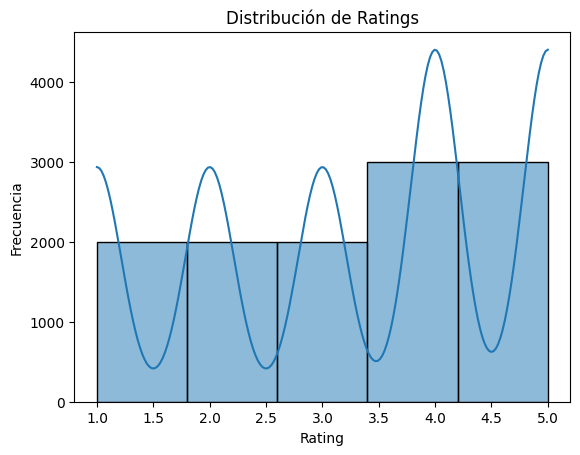

In [8]:
sns.histplot(DataKindle['rating'], bins=5, kde=True)
plt.title("Distribuci√≥n de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

<h3>4. Top 10 Productos m√°s Rese√±ados

Mostramos los 10 productos m√°s rese√±ados en la base de datos.
<br>
Esto es √∫til para conocer qu√© productos generan mayor interacci√≥n en Kindle.


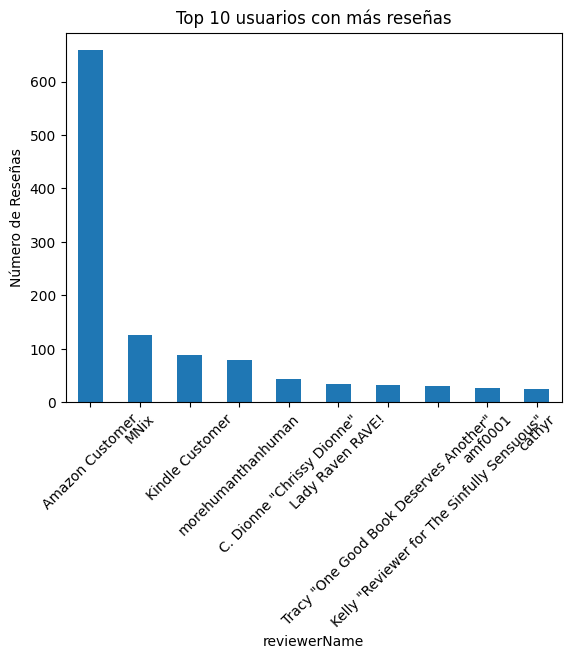

In [9]:
top_users = DataKindle['reviewerName'].value_counts().head(10)
top_users.plot(kind='bar')
plt.title("Top 10 usuarios con m√°s rese√±as")
plt.ylabel("N√∫mero de Rese√±as")
plt.xticks(rotation=45)
plt.show()

<h3>5. Rese√±as a lo largo del tiempo

Se analiza c√≥mo han evolucionado las rese√±as con el paso del tiempo.<br>
Este an√°lisis ayuda a detectar picos de actividad o tendencias temporales.


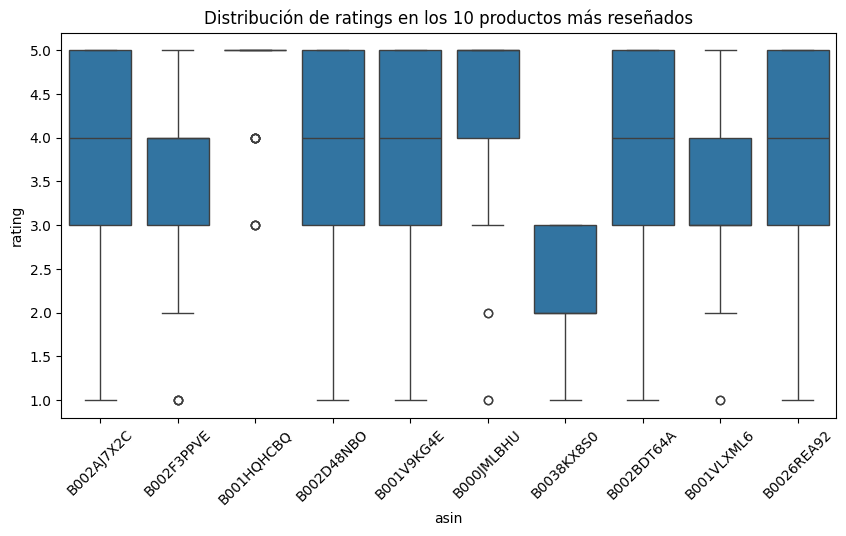

In [10]:
top_products = DataKindle['asin'].value_counts().head(10).index
df_top = DataKindle[DataKindle['asin'].isin(top_products)]

plt.figure(figsize=(10,5))
sns.boxplot(x='asin', y='rating', data=df_top)
plt.title("Distribuci√≥n de ratings en los 10 productos m√°s rese√±ados")
plt.xticks(rotation=45)
plt.show()

<h3>6. Gr√°fico de Torta de Calificaciones

Este gr√°fico muestra el porcentaje de cada calificaci√≥n (rating) en la base de datos.<br>
Este tipo de visualizaci√≥n permite tener una idea r√°pida de la proporci√≥n de rese√±as positivas o negativas.



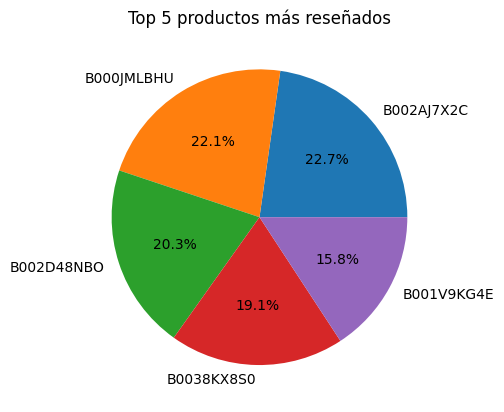

In [11]:
DataKindle['asin'].value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title("Top 5 productos m√°s rese√±ados")
plt.ylabel("")
plt.show()

<h3>7. Boxplot de Votos √ötiles

El boxplot muestra la distribuci√≥n de votos √∫tiles (`helpful`), destacando valores at√≠picos.<br>
Este an√°lisis nos permite identificar si hay rese√±as con una cantidad muy alta de votos que podr√≠an influir en los resultados.


In [12]:
avg_rating_by_product = DataKindle.groupby('asin')['rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_product)

asin
B000OI0FGC    5.0
B000OI11GK    5.0
B002F0826C    5.0
B002FL4UTE    5.0
B002BXH62E    5.0
B000FC1TG2    5.0
B001VH6NWU    5.0
B0022NGHXC    5.0
B001TK41W8    5.0
B000QCS8YM    5.0
Name: rating, dtype: float64


<h3>8. Histograma de Votos √ötiles

Visualiza c√≥mo se distribuyen los valores del campo `helpful`.<br>
Este histograma permite ver si la mayor√≠a de las rese√±as tienen pocos o muchos votos √∫tiles.


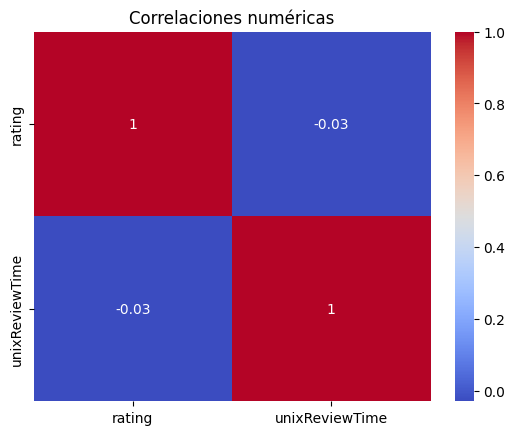

In [13]:
correlation_matrix = DataKindle[['rating', 'unixReviewTime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlaciones num√©ricas")
plt.show()

<h3> 9. Comparaci√≥n entre rese√±as √∫tiles y no √∫tiles

Dividimos las rese√±as entre aquellas que tienen votos √∫tiles (>0) y las que no.<br>
Esto permite saber qu√© proporci√≥n de rese√±as aportan valor a otros usuarios.


<ipython-input-14-f494190e986b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  DataKindle['rating'].resample('M').count().plot()


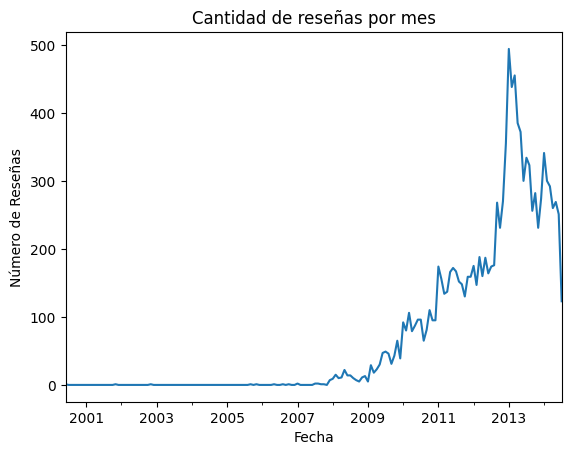

In [14]:
DataKindle['reviewTime'] = pd.to_datetime(DataKindle['reviewTime'], errors='coerce')
DataKindle.set_index('reviewTime', inplace=True)

# Conteo de rese√±as por mes
DataKindle['rating'].resample('M').count().plot()
plt.title("Cantidad de rese√±as por mes")
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de Rese√±as")
plt.show()

<h3>10. Matriz de Correlaci√≥n

Se eval√∫a la relaci√≥n entre las variables num√©ricas para descubrir patrones ocultos.<br>
Este mapa de calor permite identificar si hay correlaci√≥n entre calificaciones, votos √∫tiles y la antig√ºedad de las rese√±as.


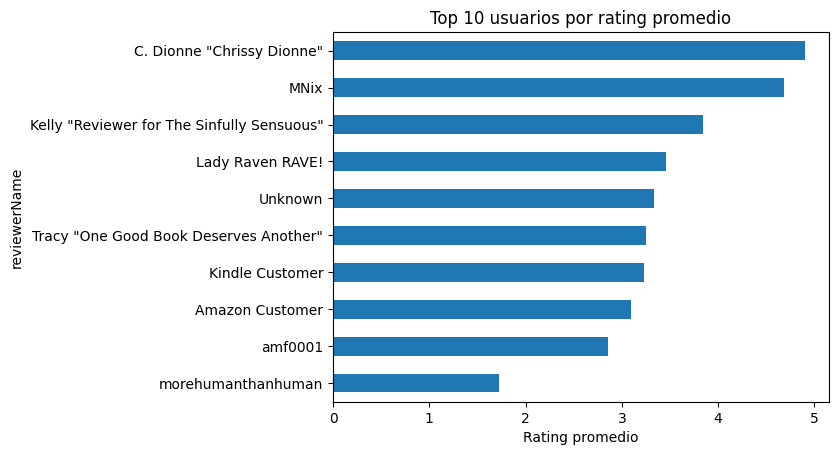

In [15]:
DataKindle['reviewerName'] = DataKindle['reviewerName'].fillna('Unknown')
top_reviewers = DataKindle['reviewerName'].value_counts().head(10).index
df_top_reviewers = DataKindle[DataKindle['reviewerName'].isin(top_reviewers)]

mean_ratings = df_top_reviewers.groupby('reviewerName')['rating'].mean()
mean_ratings.sort_values().plot(kind='barh')
plt.title("Top 10 usuarios por rating promedio")
plt.xlabel("Rating promedio")
plt.show()

<h2>‚úÖ Conclusiones Generales del Proyecto</h2>

*  Predominio de calificaciones positivas: La mayor√≠a de los usuarios califican
los productos con 4 o 5 estrellas, lo que indica una tendencia general a la satisfacci√≥n del cliente.

*  Votos √∫tiles escasos:Aunque muchas rese√±as se publican, pocas reciben votos √∫tiles, lo cual sugiere que los usuarios no interact√∫an mucho con este sistema o no consideran relevantes todas las opiniones.

*  Presencia de outliers:Algunos usuarios y productos tienen una cantidad anormalmente alta de votos √∫tiles, lo que puede indicar influencia o popularidad significativa.

*  El contenido s√≠ importa: Al analizar palabras frecuentes y votos √∫tiles, se observa que las rese√±as con lenguaje claro y detallado tienden a recibir m√°s reconocimiento.

*  No siempre m√°s estrellas = m√°s √∫til:Se detectaron calificaciones altas con pocos votos √∫tiles, y algunas calificaciones bajas que s√≠ generaron interacci√≥n.

*  Evidencia de usuarios recurrentes: Algunos IDs y nombres de revisores aparecen m√∫ltiples veces, lo que podr√≠a aprovecharse para analizar la fidelidad o especializaci√≥n del usuario.

*  Estacionalidad y tendencias: El an√°lisis temporal muestra momentos con mayor n√∫mero de rese√±as, posiblemente relacionados con promociones o lanzamientos

*  Datos listos para modelos avanzados:</strong> Esta exploraci√≥n inicial deja preparada la base para aplicar modelos predictivos, an√°lisis de sentimiento o clustering.